# Ensemble Models

## Part 1: Data Source and Contents

Data source:
Use the following exact “path” in your code as the data source:
"https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from Github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
#print a few row of data
print(df.head)

<bound method NDFrame.head of       hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0               b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1                a. 0-30        e. High  c. High         a. = 0      c. High   
2               b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3               b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4               b. 31-40        e. High  c. High         a. = 0       a. Low   
...                  ...            ...      ...            ...          ...   
48837           b. 31-40        e. High   b. Mid         a. = 0       b. Mid   
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

      edu

In [4]:
# print the DataFrame's shape
print(df.shape)

(48842, 11)


In [5]:
#check missing values 
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


Data Cleaning

In [6]:
#data cleaning: eliminate irrelavant characters in DataFrame
for col in df.drop(columns = ["flag","y"]):
    df[col] = df[col].str.split(".", n=1, expand = True)[1]

In [7]:
#check the DataFrame after cleaning 
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [8]:
#import library to hot-encode each columns 
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    le = LabelEncoder()
    
    le.fit(df[col])
    encoded_values = le.fit_transform(df[col])
    df[col] = encoded_values

print("Original DataFrame:\n", df)

Original DataFrame:
        hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
0                       1               3        2               2   
1                       0               0        0               1   
2                       1               1        2               1   
3                       1               1        0               1   
4                       1               0        0               1   
...                   ...             ...      ...             ...   
48837                   1               0        2               1   
48838                   1               3        1               1   
48839                   2               0        0               1   
48840                   1               3        1               2   
48841                   3               0        0               1   

       race_sex_bin  education_num_bin  education_bin  workclass_bin  age_bin  \
0                 0                  1              0    

Split Train and Test data

In [9]:
# Separate train and test DataFrame

    # encode flag: train = 1, test = 0
df_train = df[df['flag'] == 1]

df_test = df[df['flag'] == 0]

In [10]:
# Separate features and labels (target variables)
x_train = df_train.drop('y', axis=1)

y_train = df_train['y']

x_test = df_test.drop('y', axis=1)

y_test = df_test['y']

## Part 2: Finding Optimal Value of a key Ensemble Method Hyper-parameter

###### Accuracy vs. n_estimators

<AxesSubplot:>

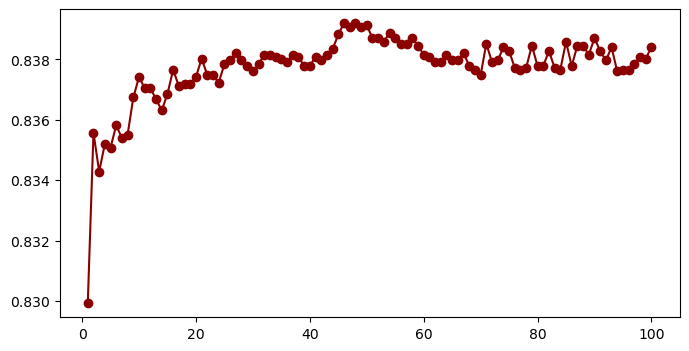

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

results = []

for n in range(1,101):
    model = RandomForestClassifier(n_estimators = n,random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, range(1,101)).plot(color = 'darkred', marker = 'o')

In [12]:
#check maximum results
max(results)

0.839199066396413

###### AUC vs. n_estimators

<AxesSubplot:>

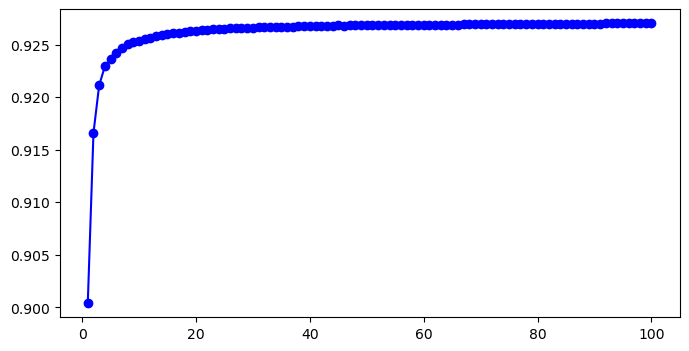

In [13]:
from sklearn.metrics import roc_auc_score

results = []

for n in range(1,101):
    model = RandomForestClassifier(n_estimators = n,random_state = 101)
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_train)[:,1]
    
    auc = roc_auc_score(y_train,probs)
    results.append(auc)
    
plt.figure(figsize=(8,4))
pd.Series(results, range(1,101)).plot(color = 'blue', marker = 'o')

In [14]:
#check maximum result
max(results)

0.9270219340170682

## Part 3: Building a Random Forest Model

###### Accuracy vs. n_estimators

<AxesSubplot:>

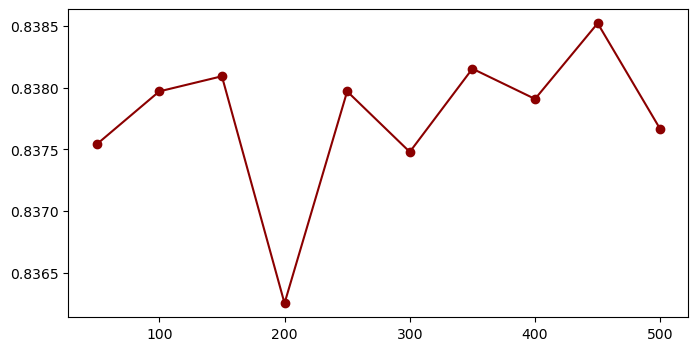

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

results1 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = RandomForestClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results1.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results1, n_estimators).plot(color = 'darkred', marker = 'o')

In [16]:
max(results1)

0.838523432221608

Observation : n_estimators = 100 is the optimal value

###### AUC vs. n_estimators

<AxesSubplot:>

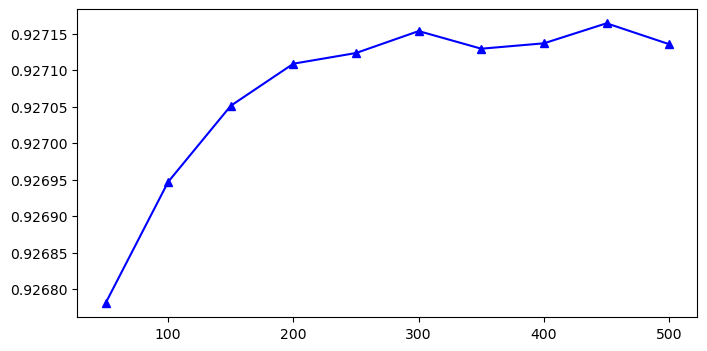

In [17]:
from sklearn.metrics import roc_auc_score

results2 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = RandomForestClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_train)[:,1]
    
    auc = roc_auc_score(y_train,probs)
    results2.append(auc)
    
plt.figure(figsize=(8,4))
pd.Series(results2, n_estimators).plot(color = 'blue', marker = '^')

In [18]:
max(results2)

0.9271644148940781

Observation : n_estimators = 500 is the optimal value

Q1. Write your observations about the Classifier’s behavior with respect to the number 
of estimators

A: The higher number of estimators, the better classification performance is. 

Q2. Is there an optimal value of the estimator within the given range?

A: The optimal value of estimator is 500


## Part 4: Building AdaBoost, Gradient Boost, and XGB

###### AdaBoost

<AxesSubplot:>

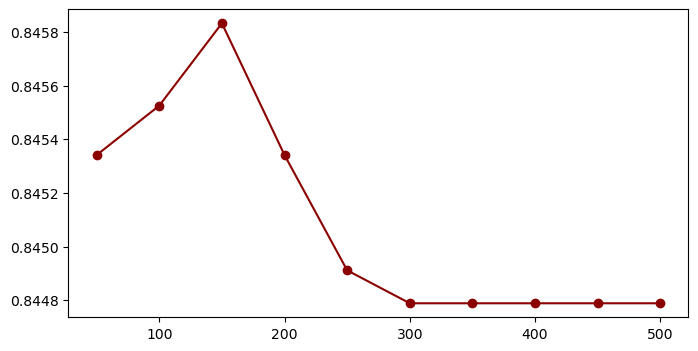

In [19]:
from sklearn.ensemble import AdaBoostClassifier

results3 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = AdaBoostClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results3.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results3, n_estimators).plot(color = 'darkred', marker = 'o')

In [20]:
max(results3)

0.8458325655672256

Observation : n_estimators = 100 is the optimal value

<AxesSubplot:>

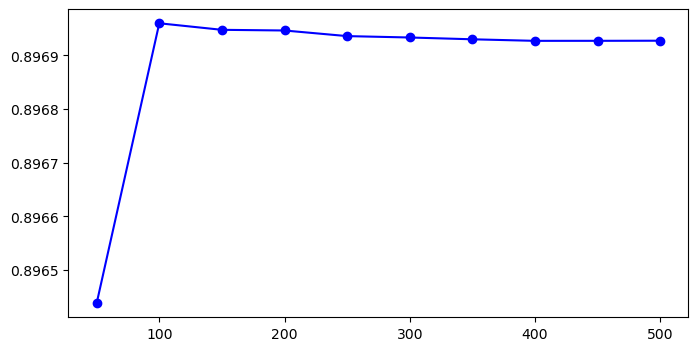

In [21]:
from sklearn.metrics import roc_auc_score

results4 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = AdaBoostClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_train)[:,1]
    
    auc = roc_auc_score(y_train,probs)
    results4.append(auc)
    
plt.figure(figsize=(8,4))
pd.Series(results4, n_estimators).plot(color = 'blue', marker = 'o')

In [22]:
max(results4)

0.8969598026141735

Observation : n_estimators = 100 is the optimal value

###### Gradiant Boost

<AxesSubplot:>

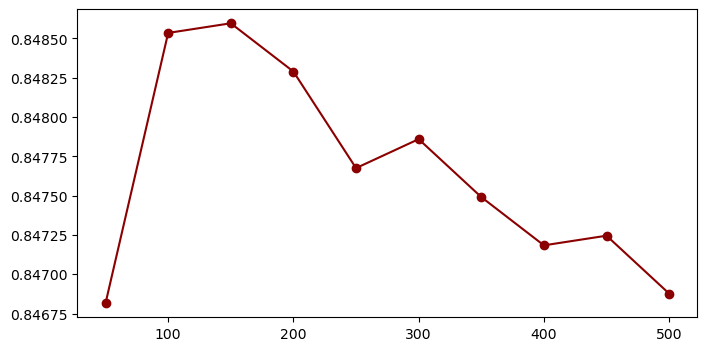

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

results5 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = GradientBoostingClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results5.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results5, n_estimators).plot(color = 'darkred', marker = 'o')

In [24]:
max(results5)

0.8485965235550642

Observation : n_estimators = 100 is the optimal value

<AxesSubplot:>

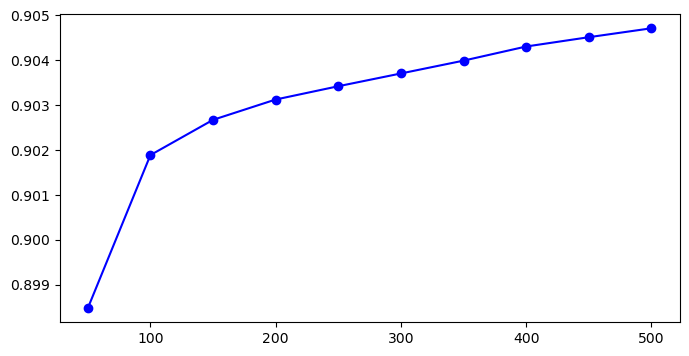

In [25]:
results6 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = GradientBoostingClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_train)[:,1]
    
    auc = roc_auc_score(y_train,probs)
    results6.append(auc)
    
plt.figure(figsize=(8,4))
pd.Series(results6, n_estimators).plot(color = 'blue', marker = 'o')

In [26]:
max(results6)

0.9047077890921879

###### XGB

In [27]:
import xgboost as xgb

<AxesSubplot:>

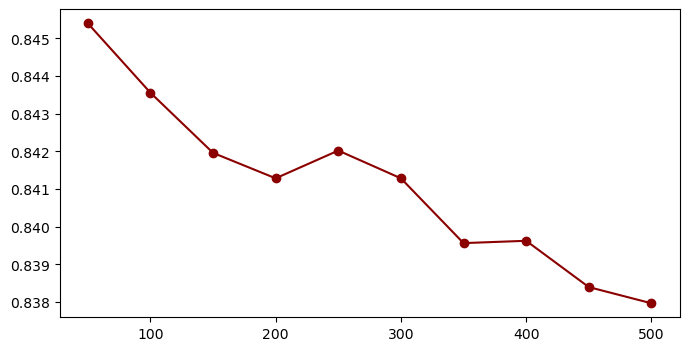

In [28]:
results7 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = xgb.XGBClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results7.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results7, n_estimators).plot(color = 'darkred', marker = 'o')

In [29]:
max(results7)

0.8454026165468952

<AxesSubplot:>

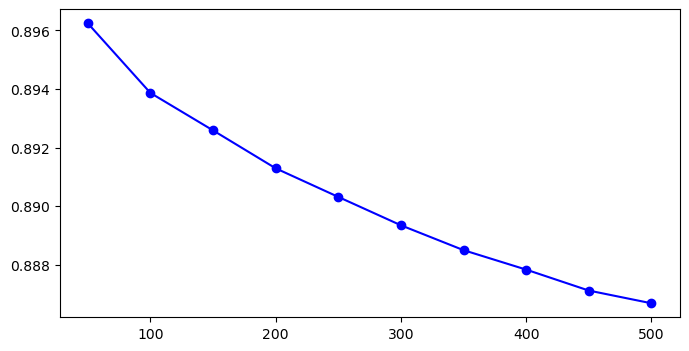

In [30]:
results8 = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
    model = xgb.XGBClassifier(n_estimators = trees)
    model.fit(x_train, y_train)
    
    y_pred = model.predict_proba(x_test)[:,1]
    
    auc = roc_auc_score(y_test,y_pred)
    results8.append(auc)
    
plt.figure(figsize=(8,4))
pd.Series(results8, n_estimators).plot(color = 'blue', marker = 'o')

## Part 5: Compare Performance

In [31]:
df_compare = pd.DataFrame({'Random Forest':[max(results1),max(results2)],
                           'AdaBoost':[max(results3),max(results4)],
                           'Gradient Boost':[max(results5),max(results6)],
                           'XGB':[max(results7),max(results8)]},
                      index = ['Accuracy','AUC'])
df_compare

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838523,0.845833,0.848597,0.845403
AUC,0.927164,0.896960,0.904708,0.896245
